In [15]:
import librosa
from librosa import display
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Audio
from pydub import AudioSegment
from pydub.silence import split_on_silence

file_path = "male-one-two-three.wav"
Audio(file_path)

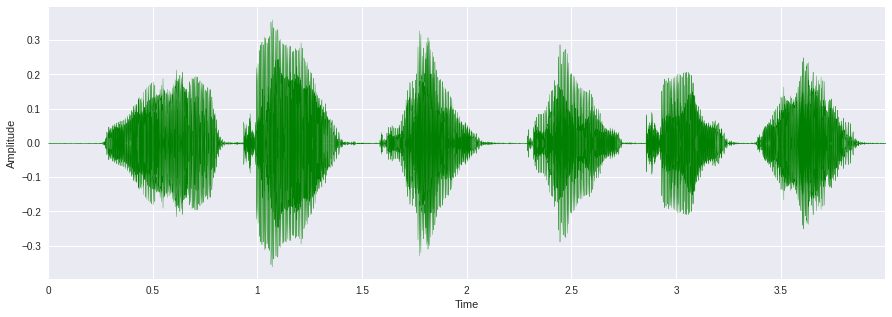

In [16]:
samples, sample_rate = librosa.load(file_path, sr=None, mono=True, offset=0.0, duration=None)

mpl.style.use('seaborn')
plt.figure(figsize=(15,5))
display.waveplot(y=samples, sr=sample_rate, color='green')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [17]:
song = AudioSegment.from_wav(file_path)
def match_target_amplitude(aPart, target_dBFS):
    change_in_dBFS = target_dBFS - aPart.dBFS
    return aPart.apply_gain(change_in_dBFS)


parts = split_on_silence (song, 
    min_silence_len = 60,
    silence_thresh = -20,
)

In [18]:
for i, part in enumerate(parts):
    silence_part = AudioSegment.silent(duration=100)
    
    audio_part = silence_part + part + silence_part
    
    normalized_part = match_target_amplitude(audio_part, -20.0)

    file_path = 'part{0}.wav'.format(i)
    
    print("Created {0}".format(file_path))
    normalized_part.export(
        file_path,
        bitrate = "192k",
        format = "wav",
    )

Created part0.wav
Created part1.wav
Created part2.wav
Created part3.wav
Created part4.wav
Created part5.wav
